In [1]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import re
from tld import get_tld
import seaborn as sns

In [2]:
data_safe = pd.read_csv("data_safe.csv")
data_safe.head()

,url,type,Category
0,https://google.com,benign,0
1,http://learn.microsoft.com,benign,0
2,http://ui.tmes-sg.trendmicro.com,benign,0
3,https://dash.cloudflare.com/,benign,0
4,vfs.com/,benign,0


In [3]:
data_phish = pd.read_csv("data_phish.csv")
data_phish.head()

,url,type,Category
0,br-icloud.com.br,phishing,1
1,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing,1
2,http://marketingbyinternet.com/mo/e56508df639f...,phishing,1
3,https://docs.google.com/spreadsheet/viewform?f...,phishing,1
4,retajconsultancy.com,phishing,1


In [4]:
data = pd.concat([data_phish, data_safe]).reset_index(drop=True)
data

,url,type,Category
0,br-icloud.com.br,phishing,1
1,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing,1
2,http://marketingbyinternet.com/mo/e56508df639f...,phishing,1
3,https://docs.google.com/spreadsheet/viewform?f...,phishing,1
4,retajconsultancy.com,phishing,1
...,...,...,...
188225,texaspartnersfcu.org/,benign,0
188226,cfn.scout.com/2/872375.html,benign,0
188227,http://twitter.com/share?url=http%3A//giphy.co...,benign,0
188228,uk.ask.com/wiki/Category:Edmonton_Eskimos_players,benign,0


In [5]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [6]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [7]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [8]:
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br
1,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing,1,42,signin.eby.de.zukruygxctzmmqi.civpro.co.za
2,http://marketingbyinternet.com/mo/e56508df639f...,phishing,1,67,marketingbyinternet.com
3,https://docs.google.com/spreadsheet/viewform?f...,phishing,1,87,docs.google.com
4,retajconsultancy.com,phishing,1,20,retajconsultancy.com


In [9]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [10]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing,1,42,signin.eby.de.zukruygxctzmmqi.civpro.co.za,0,0,0,0,6,0,0,0,0,0,0,0,0
2,http://marketingbyinternet.com/mo/e56508df639f...,phishing,1,67,marketingbyinternet.com,0,0,0,0,1,0,0,0,0,0,0,0,1
3,https://docs.google.com/spreadsheet/viewform?f...,phishing,1,87,docs.google.com,0,1,0,1,2,0,0,0,0,0,0,0,1
4,retajconsultancy.com,phishing,1,20,retajconsultancy.com,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 0 #safe
    else:
        # print 'No matching pattern found'
        return 1 #phish

In [12]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

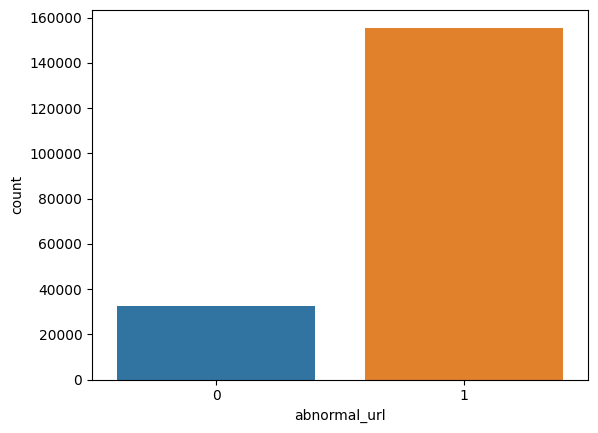

In [13]:
sns.countplot(x='abnormal_url', data=data);

In [14]:
def https(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # safe
        return 0
    else:
        # phish
        return 1

In [15]:
data['https'] = data['url'].apply(lambda i: https(i))

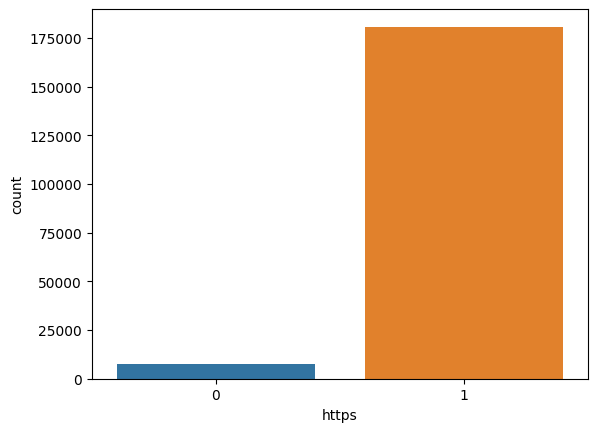

In [16]:
sns.countplot(x='https', data=data);

In [17]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [18]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

In [19]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [20]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [21]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [22]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

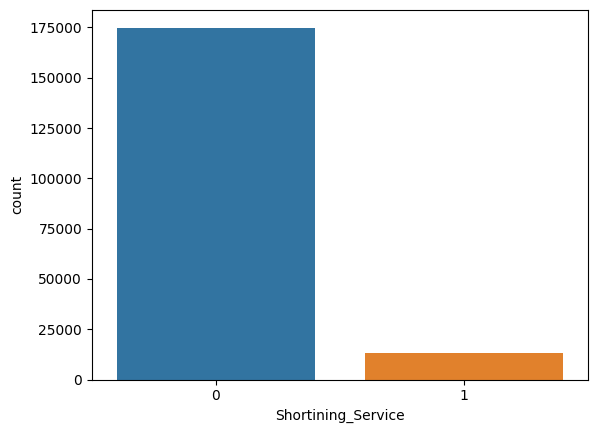

In [23]:
sns.countplot(x='Shortining_Service', data=data);

In [24]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [25]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [26]:
import matplotlib.pyplot as plt

In [27]:
data['having_ip_address'].value_counts()

0    187690
1       540
Name: having_ip_address, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_19128\1379355153.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linewidths=.5)


<AxesSubplot: >

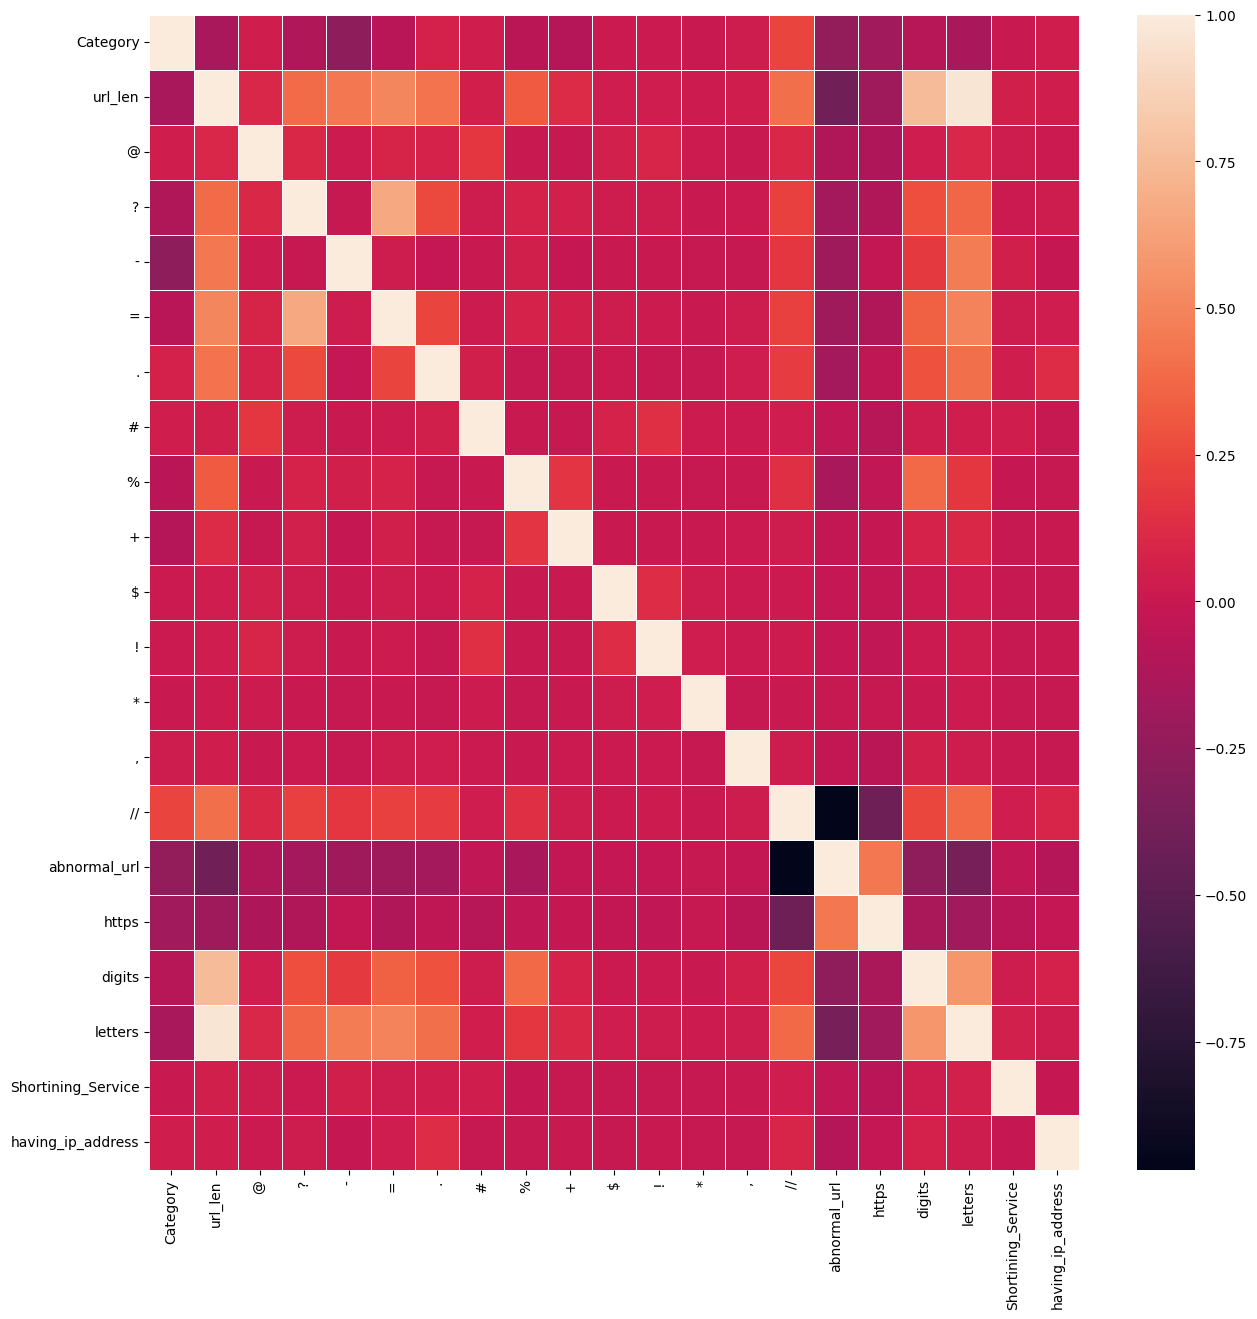

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [29]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_test

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
11056,28,0,0,1,0,3,0,0,0,0,0,0,0,0,1,1,4,20,0,0
2147,42,0,0,0,0,6,0,0,0,0,0,0,0,0,1,1,2,34,0,0
183131,58,0,0,5,0,1,0,0,0,0,0,0,0,0,1,1,10,39,0,0
40043,46,0,0,1,0,2,0,0,0,0,0,0,0,1,0,1,0,38,0,0
14187,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66990,27,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,4,19,0,0
66496,27,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,4,19,0,0
148685,37,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4,28,0,0
68489,42,0,0,1,0,3,0,0,0,0,0,0,0,0,1,1,1,34,1,0


In [32]:
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [33]:
from keras.layers import Dropout

In [34]:
# Build the LSTM model
#forget gate
#input gate
#output gate
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(75, return_sequences=False))
model.add(Dense(50, activation='relu', use_bias=True))
model.add(Dense(25, activation='relu', use_bias=True))
model.add(Dense(1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 130)           68640     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49920     
                                                                 
 dense (Dense)               (None, 55)                3575      
                                                                 
 dense_1 (Dense)             (None, 25)                1400      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,561
Trainable params: 123,561
Non-trainable params: 0
_________________________________________________________________


In [36]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

In [37]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

In [38]:
# Train the model
model_check = ModelCheckpoint(filepath="model_lstm_fixed_171.h5", monitor="val_accuracy", mode='max', save_best_only=True)
history = model.fit(X_train, y_train, batch_size=420, epochs=15, validation_data=(X_test,y_test), callbacks=model_check)

Epoch 1/15
359/359 [==============================] - 37s 99ms/step - loss: 0.2272 - accuracy: 0.6255 - val_loss: 0.2078 - val_accuracy: 0.6704
Epoch 2/15
359/359 [==============================] - 37s 103ms/step - loss: 0.1985 - accuracy: 0.6902 - val_loss: 0.1750 - val_accuracy: 0.7420
Epoch 3/15
359/359 [==============================] - 38s 105ms/step - loss: 0.1643 - accuracy: 0.7503 - val_loss: 0.1628 - val_accuracy: 0.7467
Epoch 4/15
359/359 [==============================] - 37s 103ms/step - loss: 0.1584 - accuracy: 0.7577 - val_loss: 0.1567 - val_accuracy: 0.7596
Epoch 5/15
359/359 [==============================] - 39s 109ms/step - loss: 0.1552 - accuracy: 0.7619 - val_loss: 0.1540 - val_accuracy: 0.7638
Epoch 6/15
359/359 [==============================] - 38s 105ms/step - loss: 0.1539 - accuracy: 0.7626 - val_loss: 0.1520 - val_accuracy: 0.7664
Epoch 7/15
359/359 [==============================] - 37s 104ms/step - loss: 0.1515 - accuracy: 0.7646 - val_loss: 0.1532 - val_acc

In [39]:
model.predict(X_test)

1177/1177 [==============================] - 6s 4ms/step


array([[1.0345176 ],
       [0.8342193 ],
       [0.05583663],
       ...,
       [0.14530173],
       [0.67556465],
       [0.5120749 ]], dtype=float32)

In [40]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
295/295 [==============================] - 4s 14ms/step - loss: 0.1189 - accuracy: 0.8193
test loss, test acc: [0.11885884404182434, 0.8193168044090271]
Generate predictions for 3 samples
1/1 [==============================] - 0s 16ms/step
predictions shape: (3, 1)


In [41]:
import matplotlib.pyplot as plt

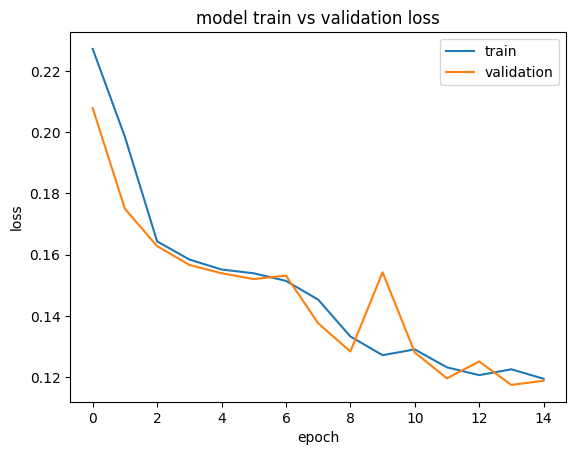

In [42]:
# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

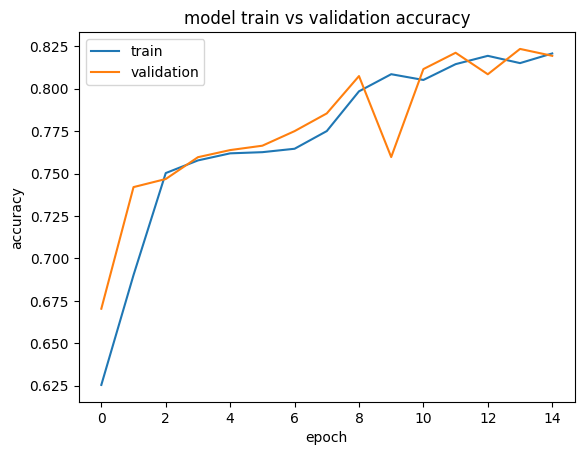

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
# from joblib import Parallel, delayed 
# import joblib 
  
  
# # Save the model as a pickle in a file 
# joblib.dump(model, 'lstm_model_new_1.h5') 
  
# # Load the model from the file 
# lstm_model_joblib = joblib.load('lstm_model_new_1.h5') 
# lstm_model_joblib